In [ ]:
#Recall the definition of the Fibonacci numbers from “Rabbits and Recurrence Relations”, which followed the recurrence relation Fn=Fn−1+Fn−2 and assumed that each pair of rabbits reaches maturity in one month and produces a single pair of offspring (one male, one female) each subsequent month.

#Our aim is to somehow modify this recurrence relation to achieve a dynamic programming solution in the case that all rabbits die out after a fixed number of months. See Figure 4 for a depiction of a rabbit tree in which rabbits live for three months (meaning that they reproduce only twice before dying).

#Given: Positive integers n≤100 and m≤20.

#Return: The total number of pairs of rabbits that will remain after the n-th month if all rabbits live for m months.


n = input("Number of generations,n to calculate? 2 < n <= 100: ")
m = input("Life span of rabbits? ")
n = int(n)
m = int(m)

In [50]:
bunnypairs = [1,1] #Bunny count at each month
#Seeding: During First two months there is only one rabbit pair
def mortalBunnyPairCounter(i,j): #i|||n; j|||m
    month = 2
    #i, j are zero-based indices
    while (month < i): #Calculating only till n. 
        if (month < j): #As long as bunny pairs do not reach age of death
            #Case of immortal bunnies: Fibonacci Sequence = Sum of populations of previous two generations 
            #When m = 3, [1,1,2]
            bunnypairs.append(bunnypairs[-2] + bunnypairs[-1]) 
        elif (month == j or month == j+1): #When bunny pairs reach age of death
            #Poor founding bunny pair dies at month 3
            # ==j   : Month 3 required for calculating month 4 (month 2 + month 3)
            # ==j+1 : Month 3 also required for calculation month 5 (month 3 + month 4)
            # When m = 3, [1,1,2,2,3]
            bunnypairs.append((bunnypairs[-2] + bunnypairs[-1]) - 1) 
        else: #For months 6, 7, 8...n
            #Bunny pairs keep dying after turning 3 months 
            #When m = 3, [1,1,2,2,3,4,...]
            bunnypairs.append((bunnypairs[-2] + bunnypairs[-1]) - (bunnypairs[-(j+1)])) 
        month += 1 #Increment month till n
    return (bunnypairs)
            

In [51]:
bunnyPairDynamics = list(mortalBunnyPairCounter(n,m))

In [52]:
month = list(range(1, n+1))

In [53]:
import pandas as pd
populationData = pd.DataFrame(
    {'Bunny Pair Count': bunnyPairDynamics,
     'Month': month
    })

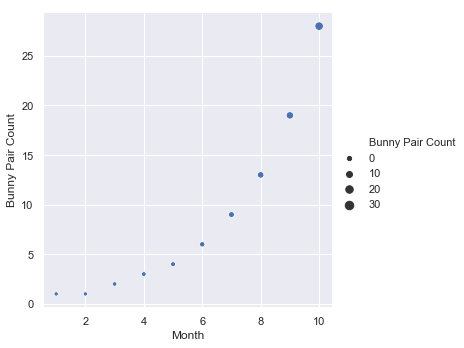

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
sns.relplot(x="Month", y="Bunny Pair Count", data=populationData, markers=True, size="Bunny Pair Count"  );